# Plot kinematic distributions of SIDIS skimming from a subset of BAND runs

last edit Sep-2, 2021 (EOC, mbp)

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [3]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisFiles/AnalysisCSVfiles/skimmed_SIDIS/'

# 1. load data

In [52]:
eepims_data,eepips_data = dict(),dict()
e_pips,e_pims = pd.DataFrame(),pd.DataFrame()
runs = [6420,6421]
for run in runs:
    eepims_data[run] = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piminus_selected_eepi_kinematics"%run
                     + ".csv")
    eepips_data[run] = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piplus_selected_eepi_kinematics"%run
                     + ".csv")
    
    e_pips = pd.concat([e_pips,eepips_data[run]])
    e_pims = pd.concat([e_pims,eepims_data[run]])

    print('loaded',len(eepims_data[run]),"(e,e'pi-)",'and',len(eepips_data[run]),"(e,e'pi+)",'pairs from run',run)

loaded 187621 (e,e'pi-) and 457235 (e,e'pi+) pairs from run 6420
loaded 186637 (e,e'pi-) and 448079 (e,e'pi+) pairs from run 6421


In [55]:
print('in total, we have',len(e_pims),"(e,e'pi-)",'and',len(e_pips),"(e,e'pi+)",'pairs')
e_pims[0:4]

in total, we have 374258 (e,e'pi-) and 905314 (e,e'pi+) pairs


,status,runnum,evnum,beam_helicity,e_P,e_Theta,e_Phi,e_Vz,pi_P,pi_Theta,...,pi_Vz,Q2,W,xB,Zpi,omega,xF,y,M_X,Unnamed: 20
0,1,6420,993.0,-1,6.33416,0.175525,1.181650,-3.39518,1.42200,0.355468,...,-3.23146,1.98541,2.47926,0.273762,0.369605,3.86584,-0.017819,0.379004,3.26060,NaN
1,1,6420,1655.0,-1,4.99247,0.206060,-1.995970,-2.84176,2.19963,0.415067,...,-2.92324,2.15459,2.91455,0.220546,0.423244,5.20753,0.056028,0.510542,3.59015,NaN
2,1,6420,3793.0,1,3.44465,0.339522,2.103520,-5.42179,3.00930,0.212050,...,-6.99265,4.01147,3.08892,0.316536,0.445947,6.75535,0.139235,0.662290,3.79835,NaN
3,1,6420,4165.0,1,4.32325,0.272566,0.204435,-4.86434,2.56385,0.572173,...,-4.26208,3.25585,2.94088,0.295321,0.436917,5.87675,-0.186305,0.576152,3.42142,NaN


# 2. Load cut values

In [28]:
cutValues = pd.read_csv('../../cutValues.csv')
display(np.array(cutValues['parameter']))

array(['Vz_e_min_inbending', 'Vz_e_max_inbending', 'Vz_e_min_outbending',
       'Vz_e_max_outbending', 'e_PCAL_W_min', 'e_PCAL_V_min',
       'e_E_PCAL_min', 'SamplingFraction_min', '(Ve-Vpi)_z_max', 'y_max',
       'Q2_min', 'W_min', 'Zpi_min', 'Zpi_max', 'e_theta_min',
       'e_theta_max', 'pi_theta_min', 'pi_theta_max', 'Ppi_min',
       'Ppi_max'], dtype=object)

In [46]:
def cutValue(cutName='W_min'):
    return (np.array(cutValues[cutValues['parameter']==cutName]['value'])[0])

# 3. Plot distributions

## 3.1 $W$ and $z$

In [47]:
Wmin = cutValue(cutName='W_min')
Zmin = cutValue(cutName='Zpi_min')
Zmax = cutValue(cutName='Zpi_max')

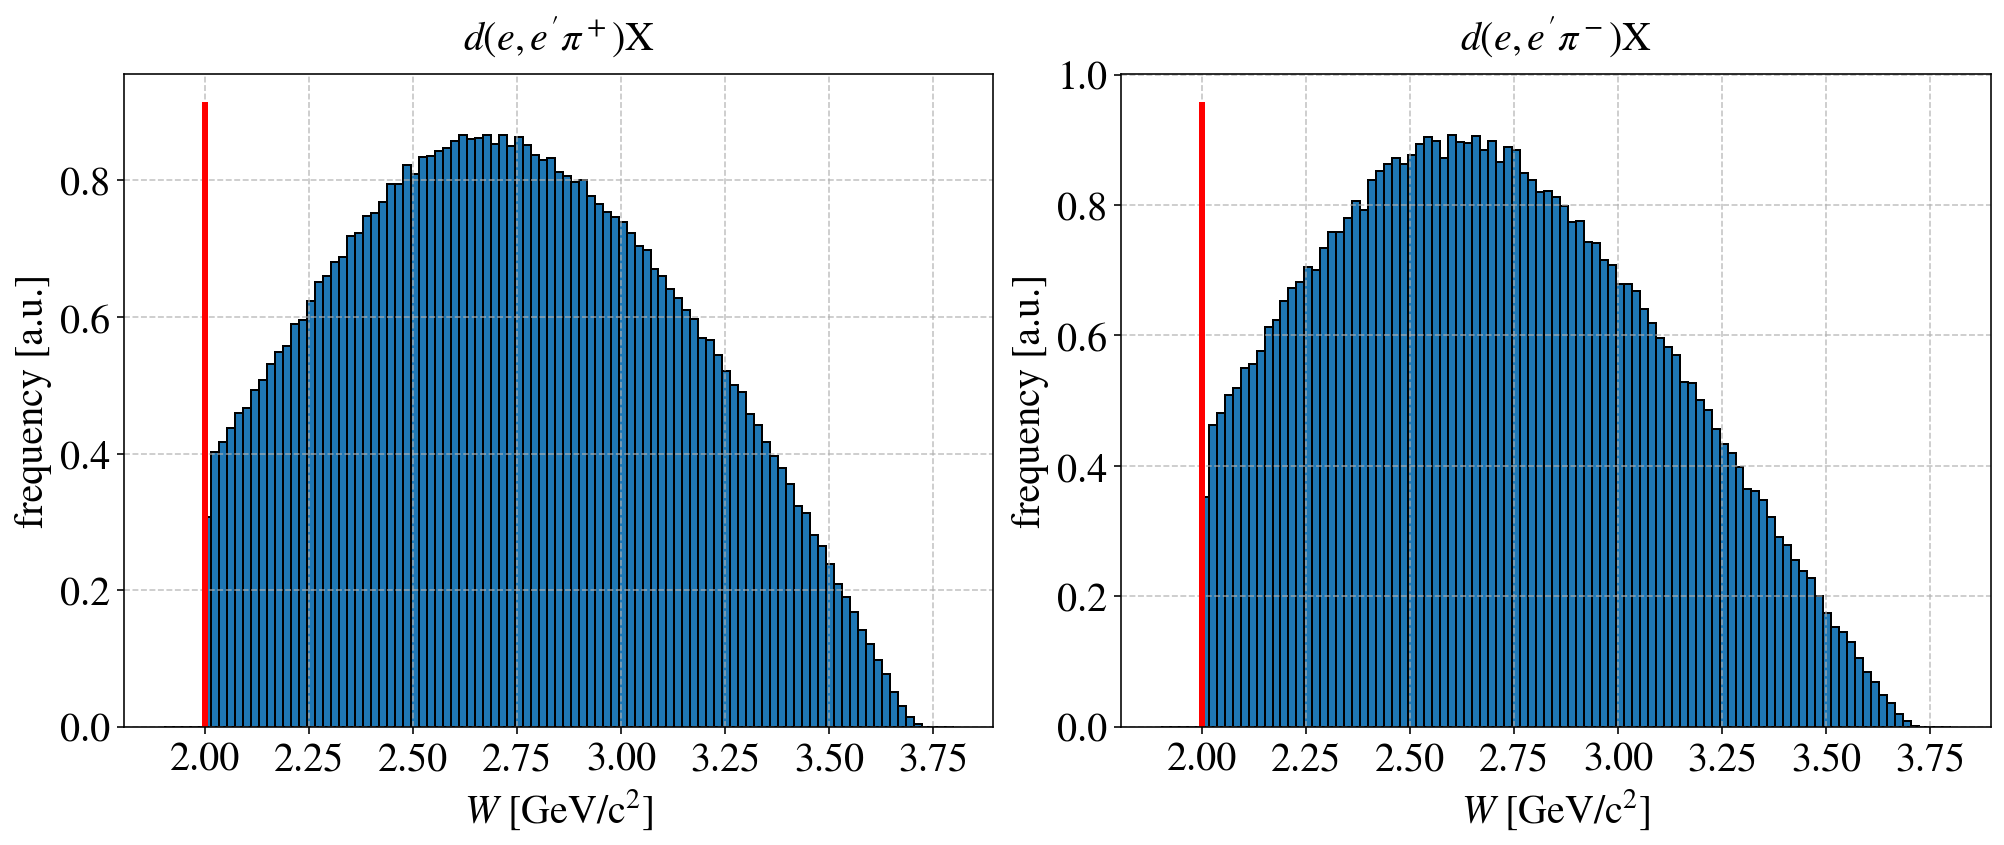

In [67]:
bins = np.linspace(1.9,3.8,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['W'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$W$ [GeV/c$^2$]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [Wmin,Wmin],ax.get_ylim(), '-r', linewidth=3)
plt.tight_layout()

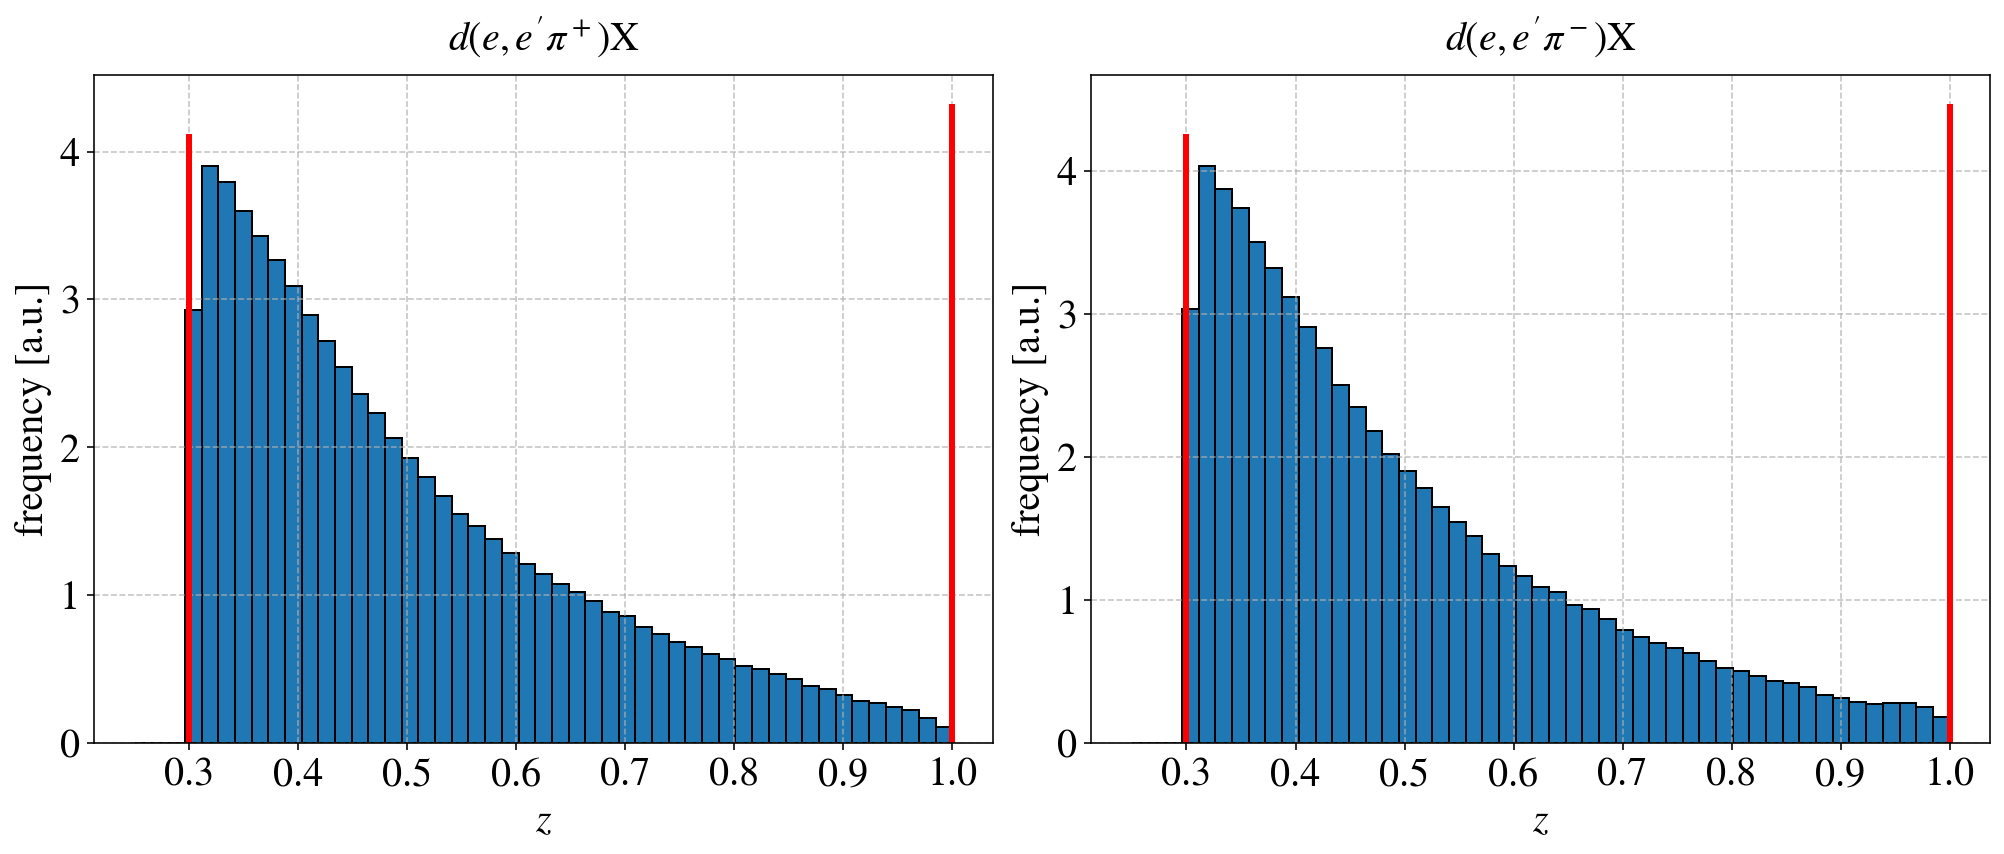

In [100]:
bins = np.linspace(0.25,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['Zpi'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$z$','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [Zmin,Zmin],ax.get_ylim(), '-r', linewidth=3)
    plt.plot( [Zmax,Zmax],ax.get_ylim(), '-r', linewidth=3)    
plt.tight_layout()

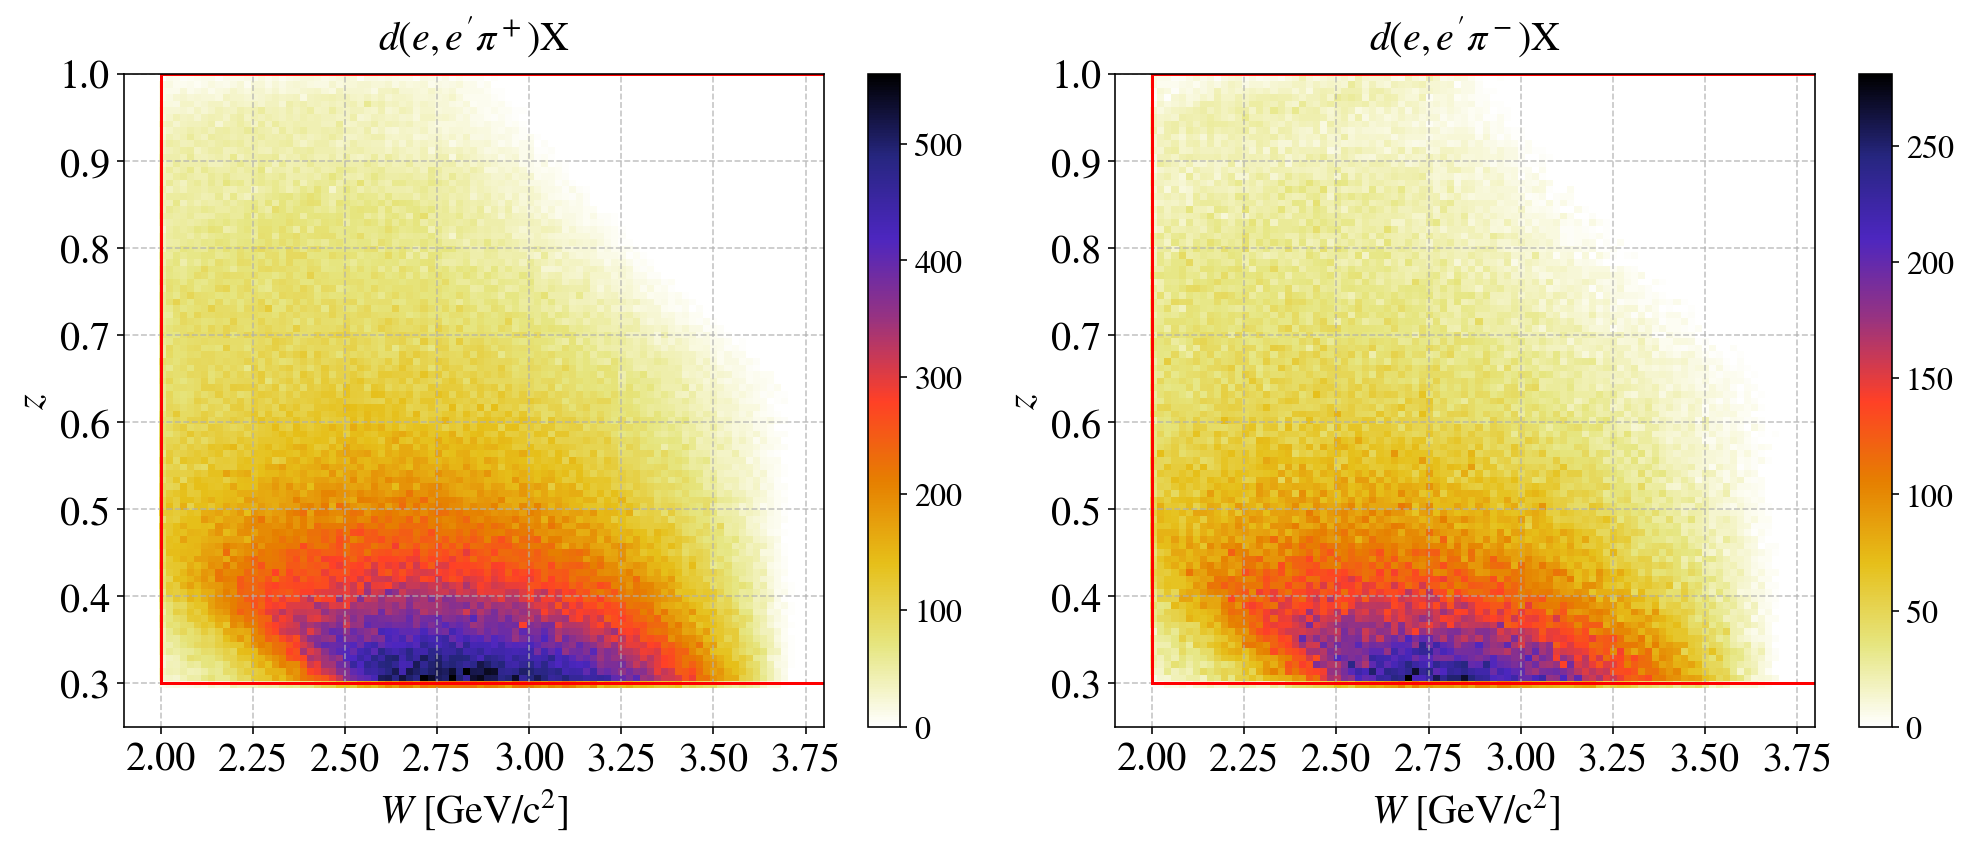

In [71]:
Nbins = 100

bins = (np.linspace(1.9,3.8,Nbins),np.linspace(0.25,1.,Nbins))
xlim = [1.8,4]
ylim = [0.25,1]

fig = plt.figure(figsize=(14,6))

for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist2d( df['W'], df['Zpi'] , bins=bins, cmap='CMRmap_r' )
    cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
    set_axes(ax,'$W$ [GeV/c$^2$]','$z$',ylim=ylim,
             title =  df_label,fontsize=20,do_add_grid=True);

    plt.plot( [Wmin,Wmin],[Zmin,np.max(ylim)], '-r')
    plt.plot( [Wmin,np.max(xlim)],[Zmin,Zmin], '-r')
    plt.plot( [Wmin,np.max(xlim)],[Zmax,Zmax], '-r')

    
plt.tight_layout()

## 3.2 $Q^2$

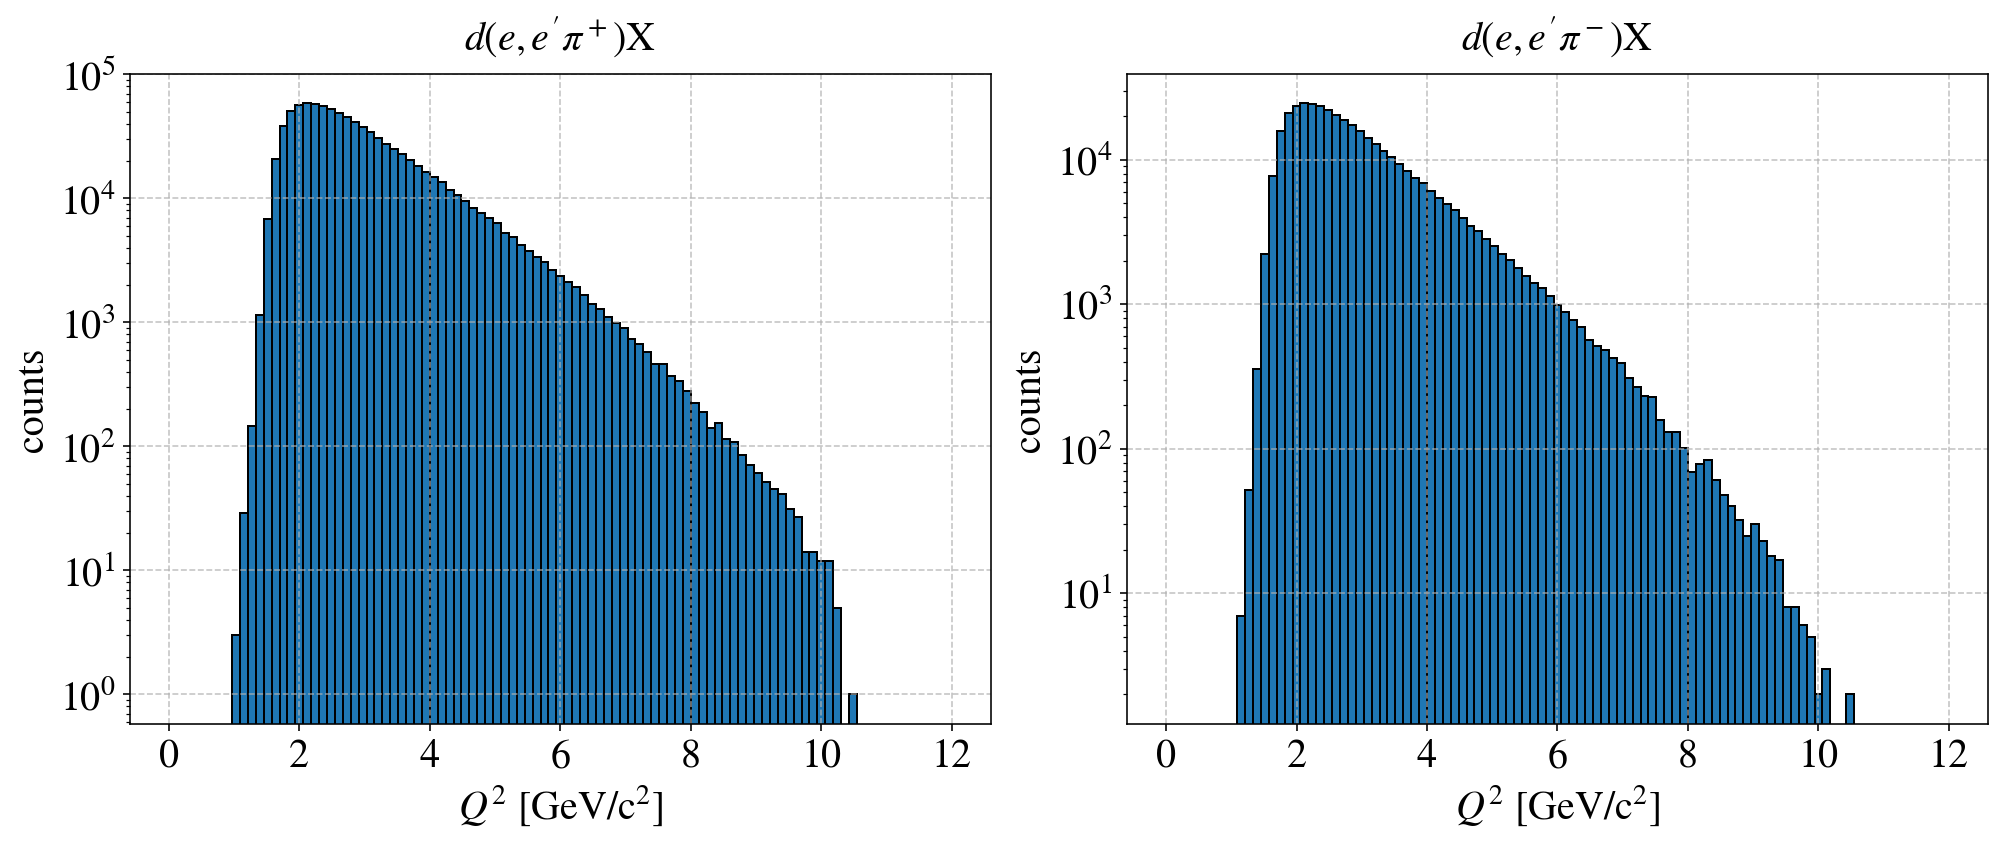

In [114]:
bins = np.linspace(0,12,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['Q2'] , bins=bins, edgecolor='k', density=False)
    set_axes(ax,'$Q^{2}$ [GeV/c$^2$]','counts',
             title = df_label,fontsize=20,do_add_grid=True);
    ax.set_yscale('log')
plt.tight_layout()

## 3.3 Feynman $x$ and Bjorken $x$

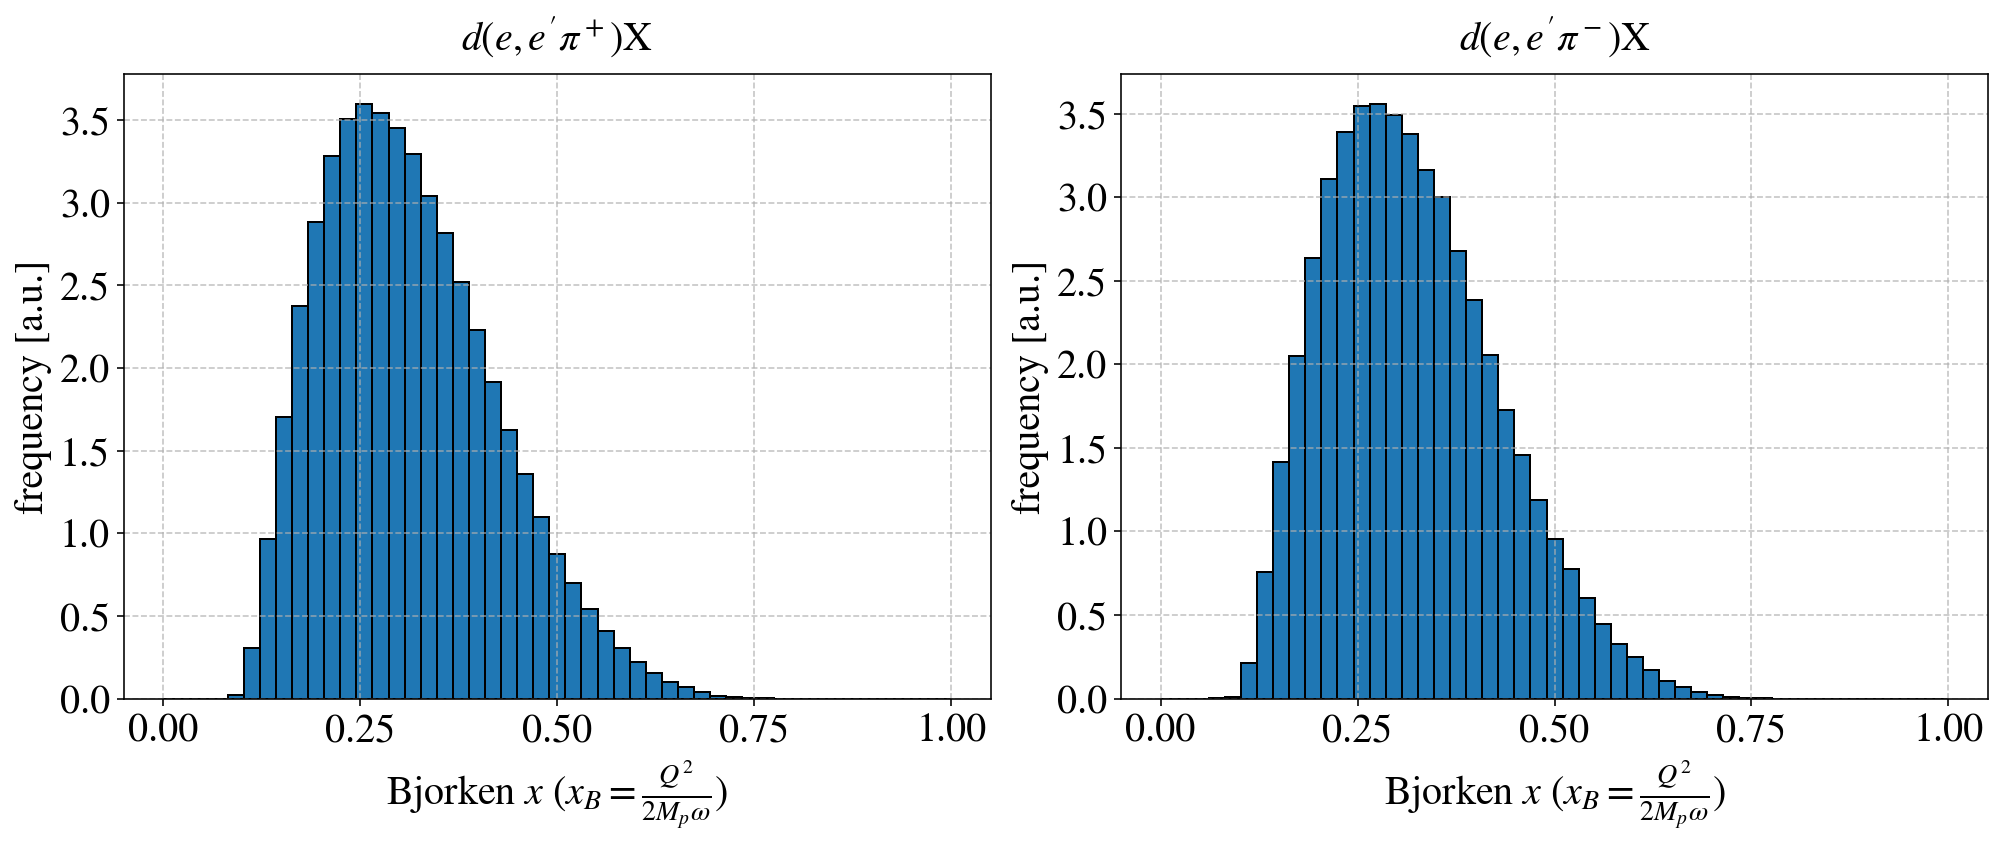

In [95]:
bins = np.linspace(0,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['xB'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'Bjorken $x$ ($x_B = \\frac{Q^2}{2M_p\omega}$)','frequency [a.u.]',
             xticks=(0,0.25,0.5,0.75,1.),
             title = df_label,fontsize=20,do_add_grid=True);
plt.tight_layout()

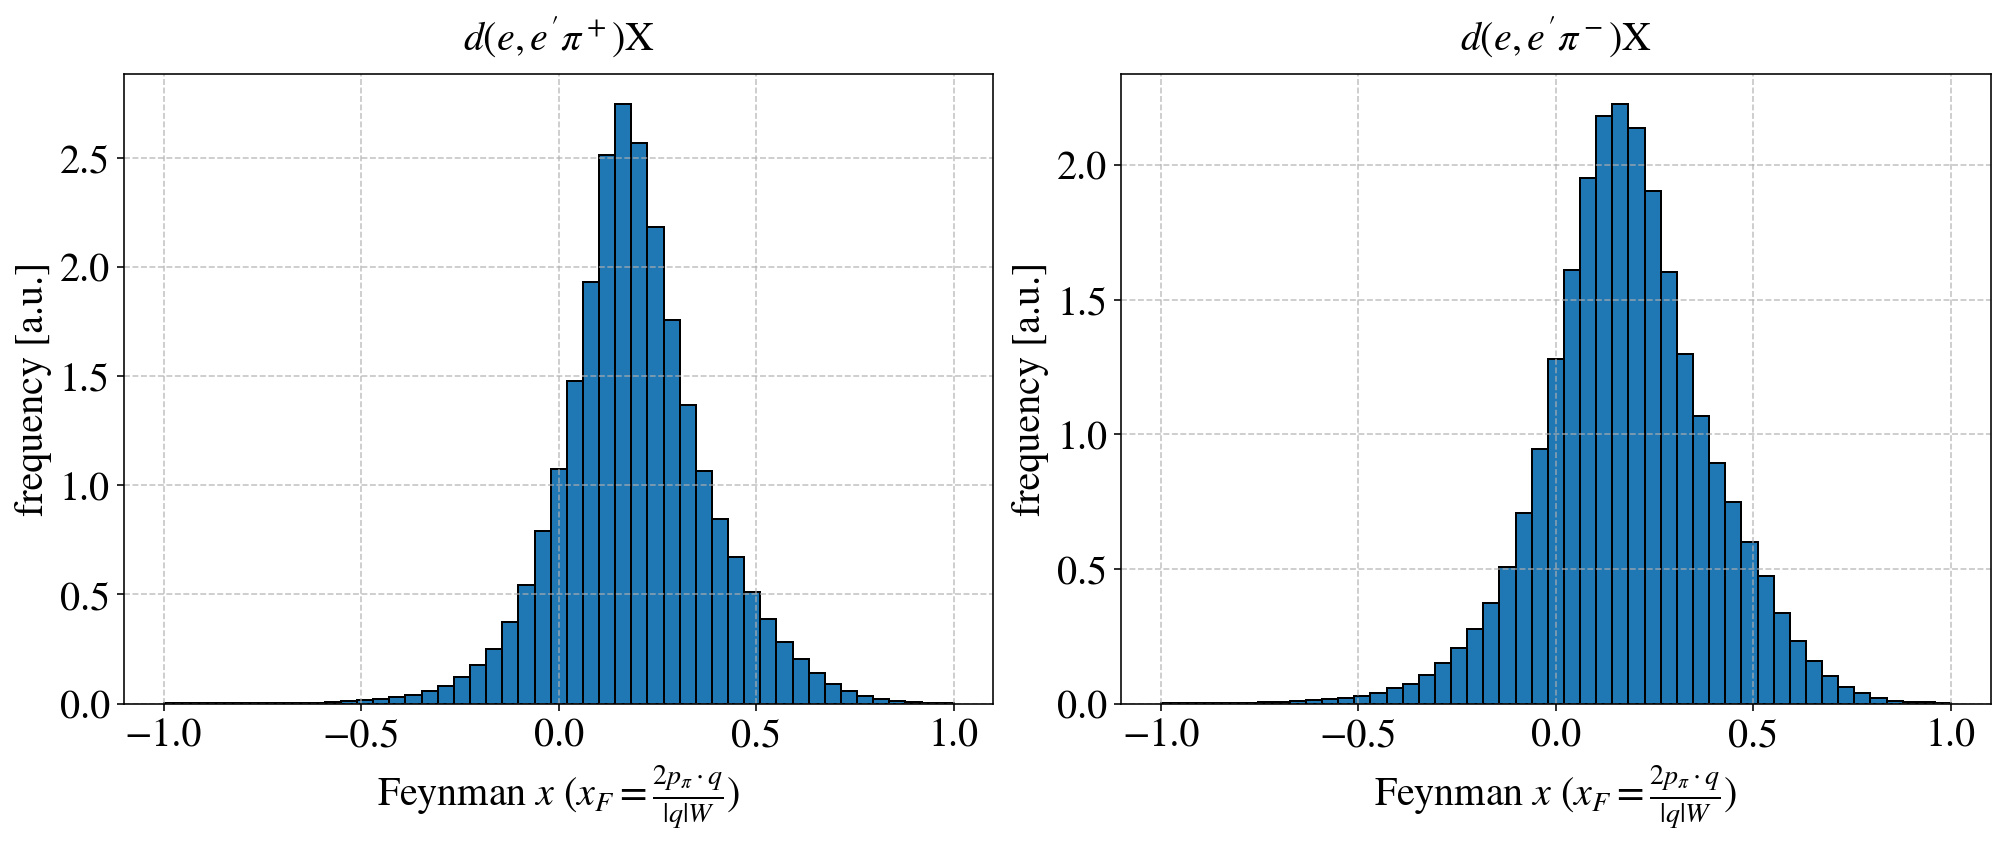

In [85]:
bins = np.linspace(-1,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['xF'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'Feynman $x$ ($x_F = \\frac{2 p_\pi \cdot q}{|q|W}$)','frequency [a.u.]',
             xticks=(-1,-.5,0,0.5,1.),
             title = df_label,fontsize=20,do_add_grid=True);
plt.tight_layout()

## 3.4 $y$

In [92]:
ymax = cutValue(cutName='y_max')

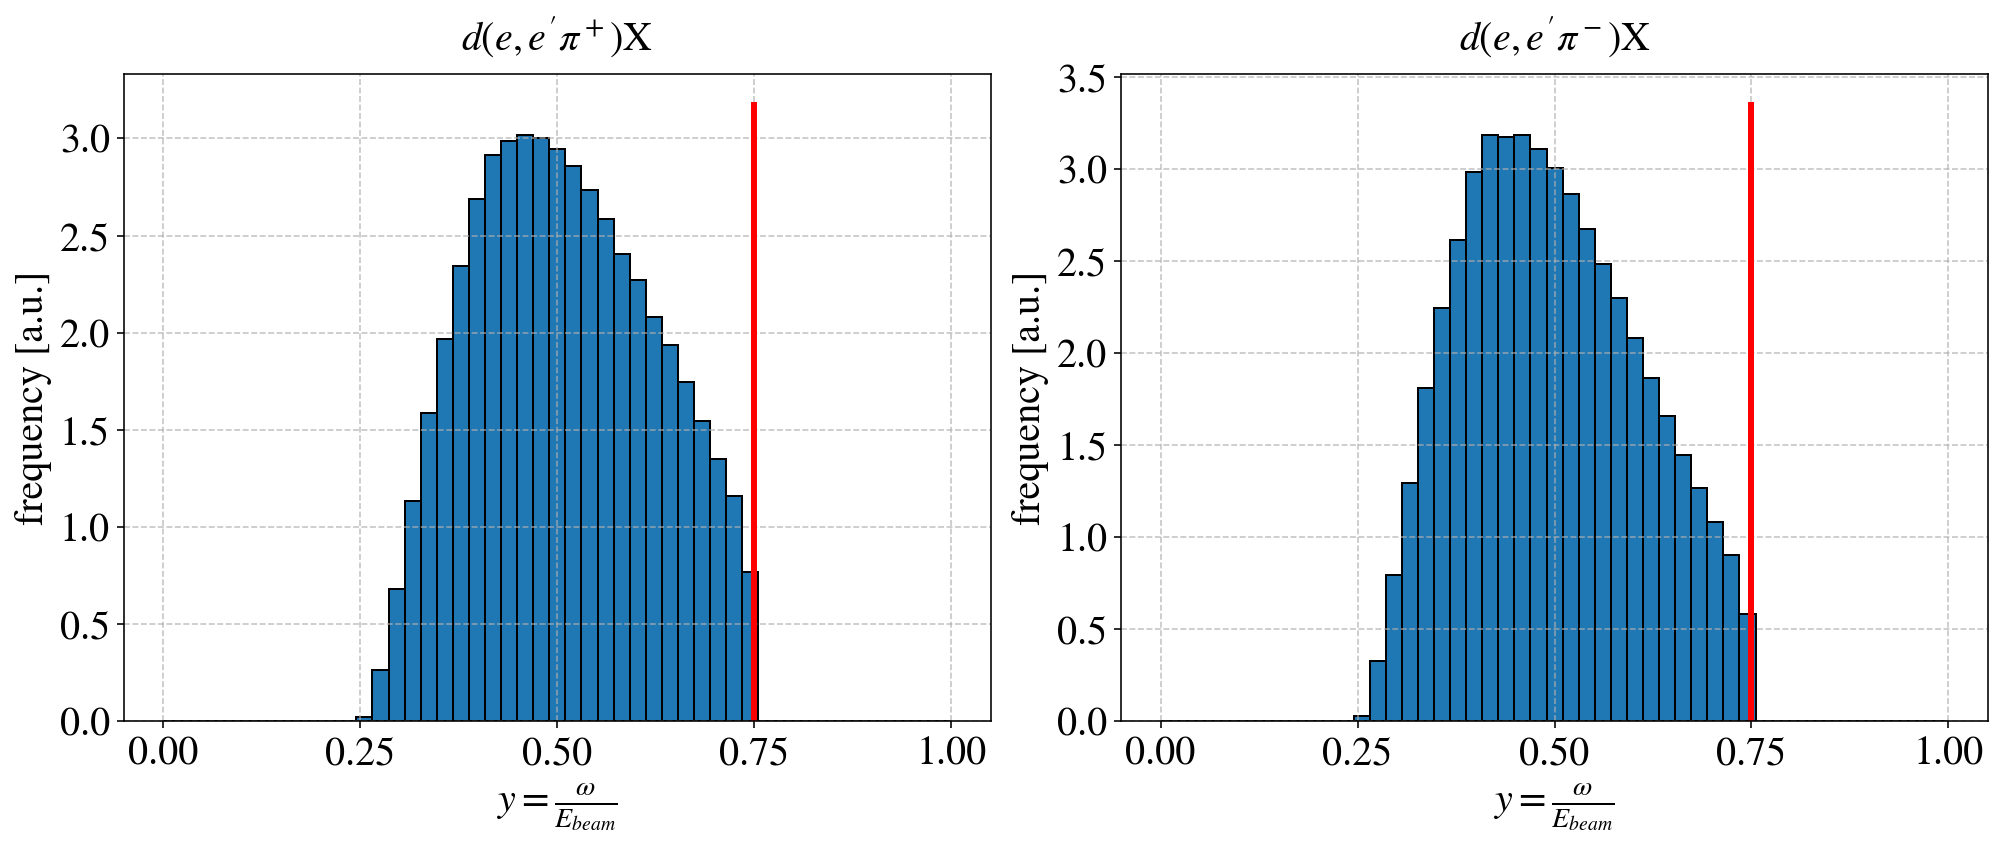

In [94]:
bins = np.linspace(0,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['y'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$y = \\frac{\omega}{E_{beam}}$','frequency [a.u.]',
             xticks=(0,0.25,0.5,0.75,1.),
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [ymax,ymax],ax.get_ylim(), '-r', linewidth=3)    
plt.tight_layout()

## 3.5 angles ($e$ and $\pi$)

In [106]:
e_theta_min = cutValue('e_theta_min')
e_theta_max = cutValue('e_theta_max')
pi_theta_min = cutValue('pi_theta_min')
pi_theta_max = cutValue('pi_theta_max')

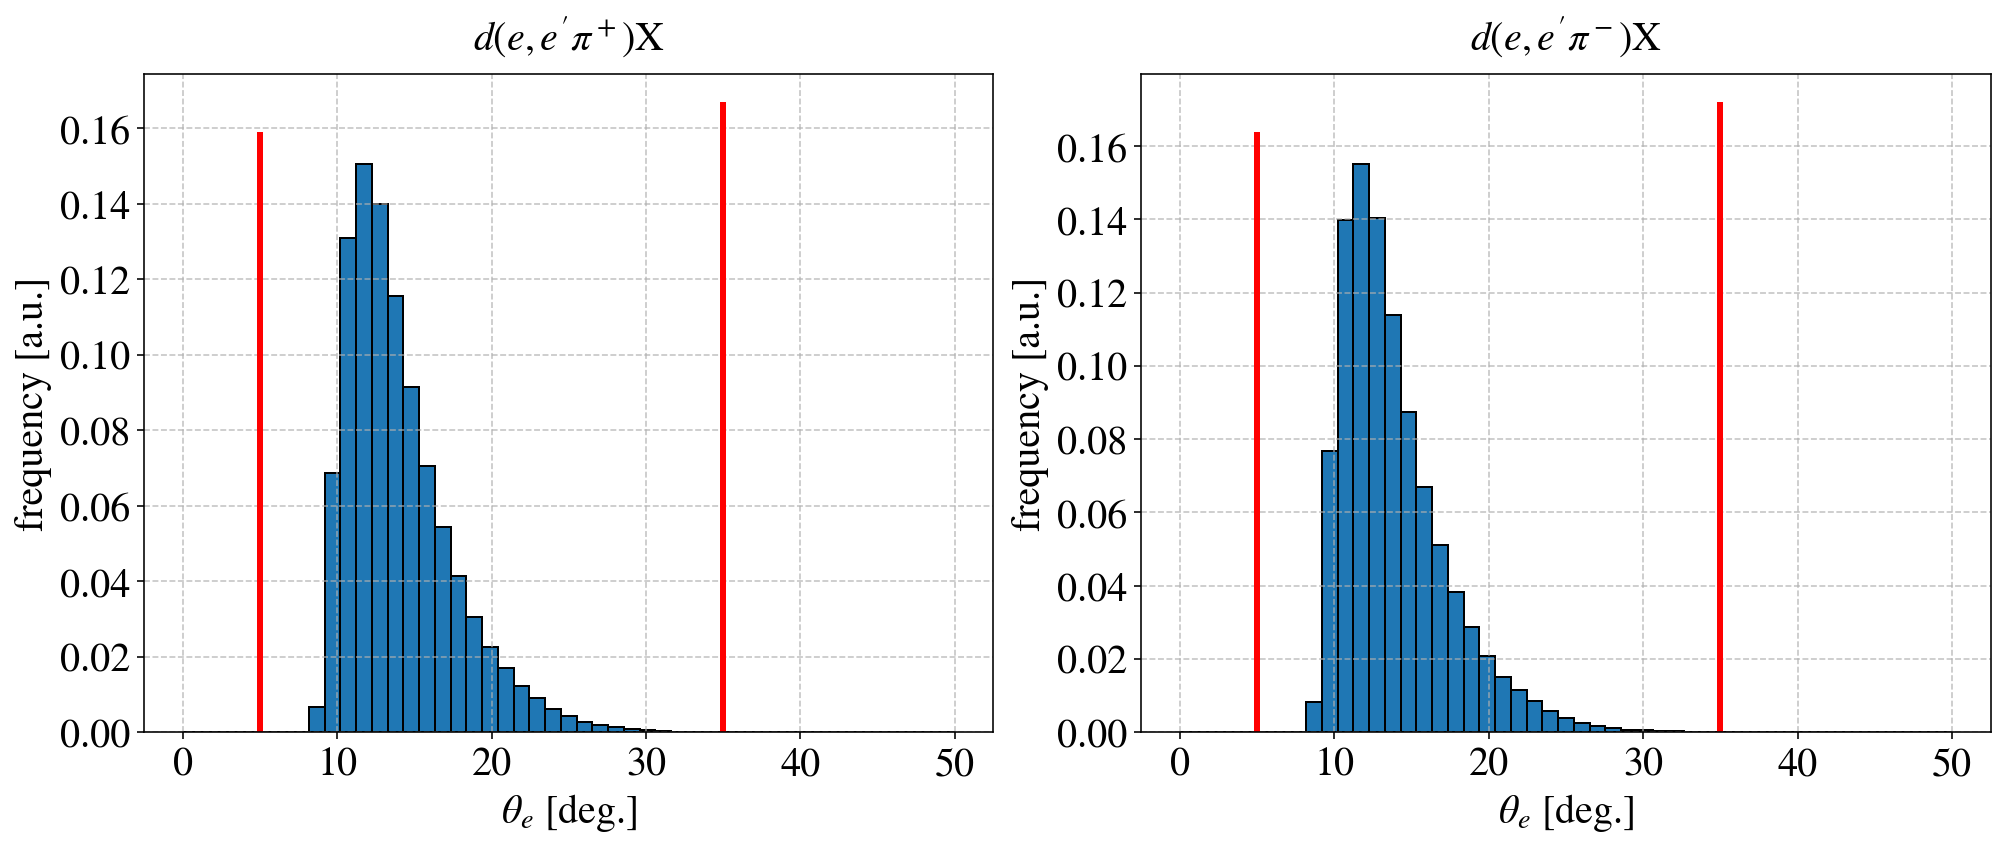

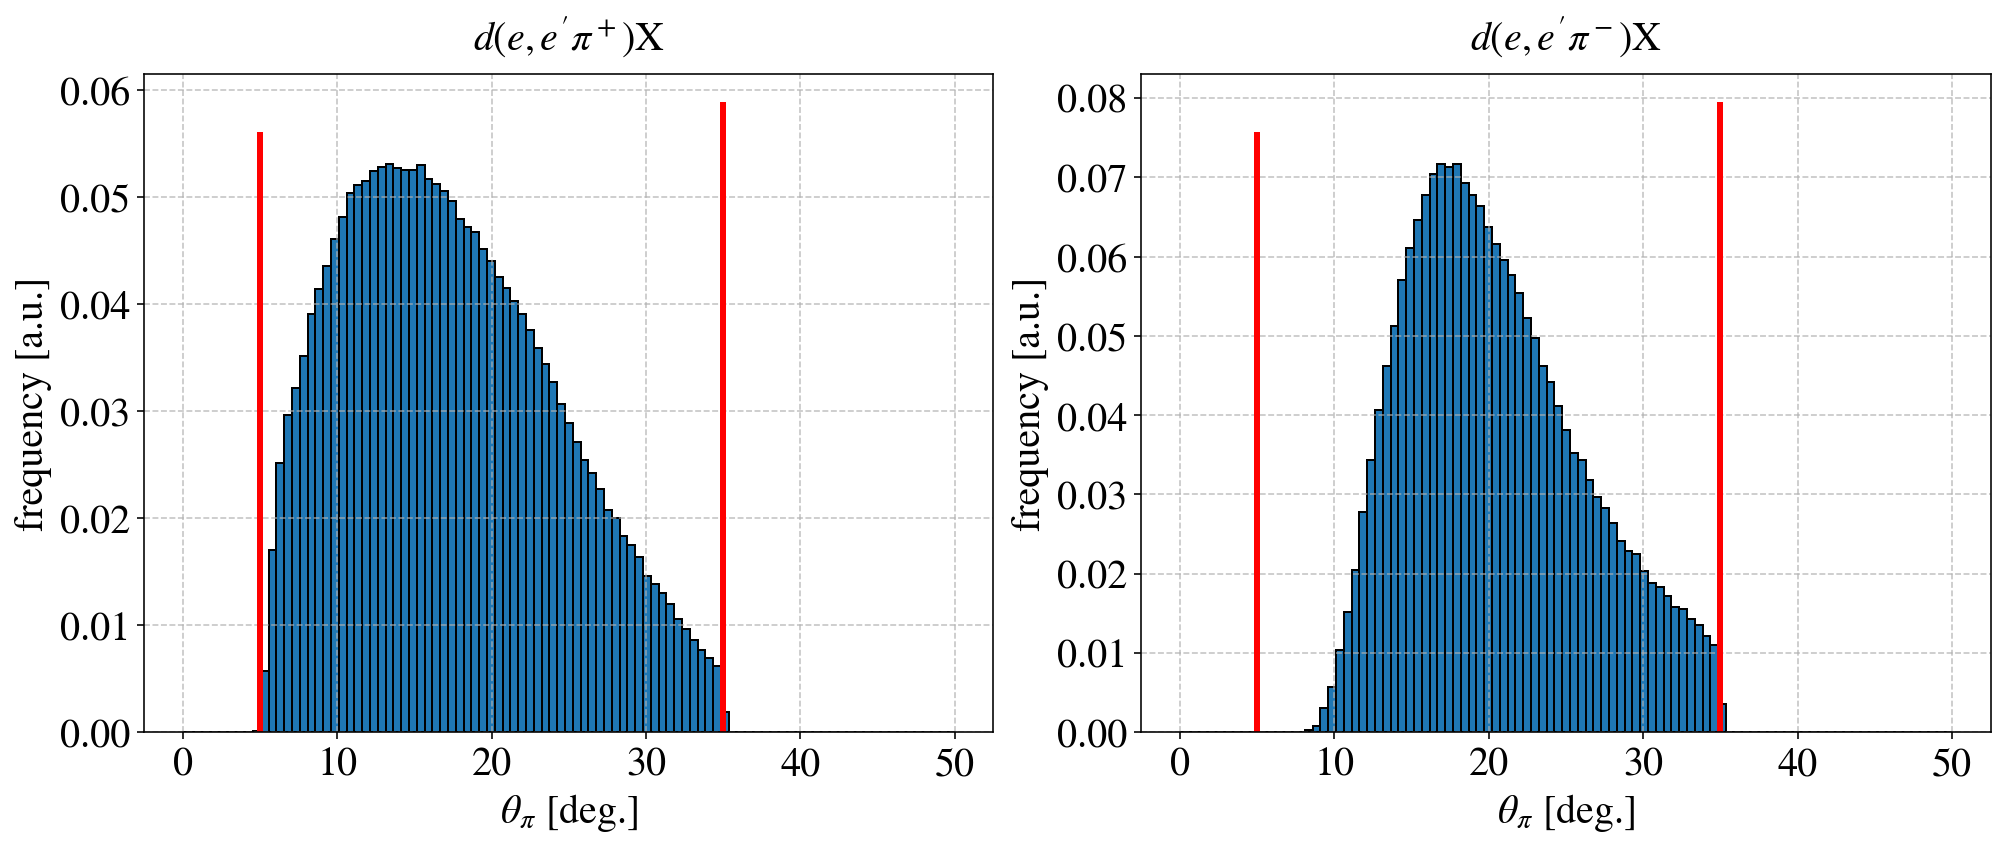

In [110]:
bins = np.linspace(0,50,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['e_Theta']*180./3.14 , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$\\theta_e$ [deg.]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [e_theta_min,e_theta_min],ax.get_ylim(), '-r', linewidth=3)    
    plt.plot( [e_theta_max,e_theta_max],ax.get_ylim(), '-r', linewidth=3)    
    
plt.tight_layout()

bins = np.linspace(0,50,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['pi_Theta']*180./3.14 , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$\\theta_\\pi$ [deg.]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [pi_theta_min,pi_theta_min],ax.get_ylim(), '-r', linewidth=3)    
    plt.plot( [pi_theta_max,pi_theta_max],ax.get_ylim(), '-r', linewidth=3)    
    
plt.tight_layout()

# arxiv